In [1]:
# These magic functions help with interactive development
# You won't need to restart your kernel when making changes to
# the code. But they don't work with changes to classes
%load_ext autoreload
%autoreload 2

from os import sys
sys.path.append("..")

import warnings
warnings.filterwarnings('ignore')

# Contents

We'll consider this workshop successful if by the end of it you can **implement your own sktime estimators** with confidence and use them in your projects!

To achieve this, in this part of the workshop we'll cover the following:
1. Basic Developer set-up with jupyter notebooks and IDEs
2. Introduction to sktime extension templates
3. Introduction to sktime basic concepts (tags, scitypes, mtypes)
3. Implement a simple sktime transformer
4. Implement a simple sktime forecasting model
4. Using the sktime testing framework

# Developer Setup

In the sktime docs you can find our [developer guide](https://www.sktime.org/en/latest/developer_guide.html#developer-guide) that includes useful information like:
* **Installation**
* Git and GitHub workflow
* Continuous integration
* Coding standards
* **Implementing Estimators**
* Adding a New Dataset
* Deprecation
* **Dependencies**
* Developing Documentation
* **Sktime testing framework overview**
* Releases

This is also very useful if you want to start contributing to the project!

During this workshop we will use jupyter notebooks to demonstrate outputs etc. and an IDE to code our own estimators. For the demo we will use VS code because that's what we're used to, we suggest you do the same! i.e. use the IDE you like. 
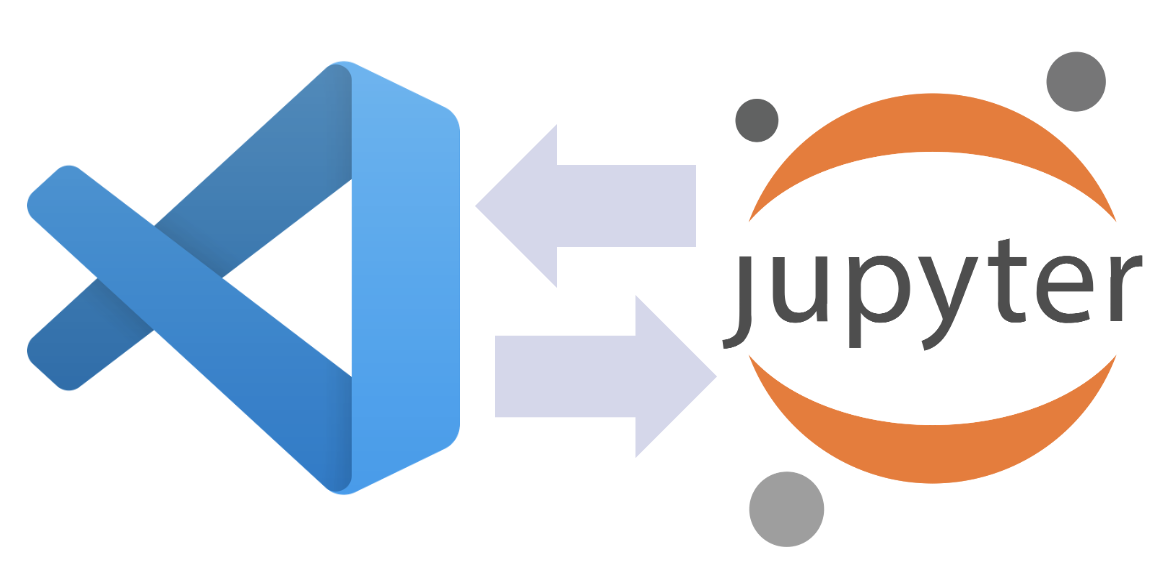

### Workshop instalation guide

First clone the repo in your laptop using the command:  
`git clone <repo-url>`  
  
Navigate to the repo clone and follow the instructions below to get your environment for the workshop up and running.  

**Simple installation:**  
Just install the dependencies (latest version of sktime, seaborne, pytest and jupyter)!  
1. `pip install -r requirements.txt`

**Using python venv:**

1. Create a python virtual environment:  
`python -m venv .venv`
2. Activate your environment:  
`source .venv/bin/activate`
3. Install the package in development mode:  
`pip install -r requirements.txt`
4. Make the environment available in jupyter:  
`python -m ipykernel install --user --name=pydata_sktime`

**Using conda env:**

1. Create a python virtual environment:  
`conda create -y -n pydata_sktime python=3.9`
2. Make sure the environment has pip:  
`conda install -y -n pydata_sktime pip`
3. Activate your environment:  
`conda activate pydata_sktime`
4. Install the package in development mode:  
`pip install -r requirements.txt`
5. Make the environment available in jupyter:  
`python -m ipykernel install --user --name=pydata_sktime`

# The Data
*If this is not your first rodeo with time series forecasting, the dataset might look familiar*

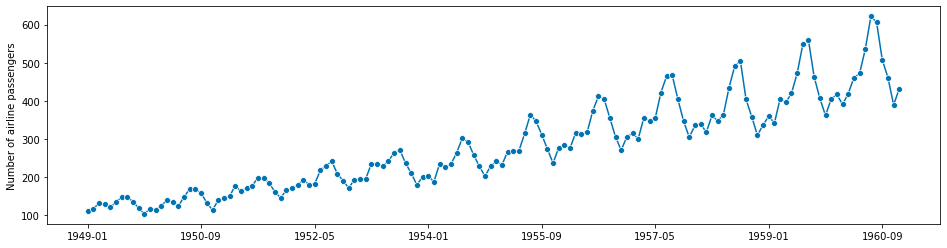

In [2]:
from matplotlib import pyplot as plt

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

y = load_airline()
plot_series(y)
plt.show()

# Implementing your own estimator

To make things easy sktime comes with it's own extension templates, you can find them here:  
https://github.com/alan-turing-institute/sktime/tree/main/extension_templates

The high-level steps to implement sktime compatible estimators are as follows:
1. identify the type of the estimator: forecaster, classifier, etc
2. copy the extension template for that kind of estimator to its intended location
3. complete the extension template
4. run the sktime test suite on the implemented estimator
5. if the test suite highlights bugs or issues, fix them and go to 4

For more information visit the [Implementing Estimators](https://www.sktime.org/en/latest/developer_guide/add_estimators.html) section in th the sktime docs

# Public VS Private methods

When implementing your estimators you will notice that all the methods you need to fill usually start with an underscore e.g. `_fit`. This is a convention in python that denotes that this method in not supposed to be accessed by the user.  

When the user calls the public method `fit` a series of typical commands like checking inputs, transforming to the correct mtype etc. are performed before `_fit` is called. 

This makes extending sktime and writting sktime compatible estimators really easy and helps avoinding copy pasting **boillerplate code** every time!

# Implementing a min-max scaler transformer

We'll now use the transformer extension templates to implement a min-max scaler transformer.

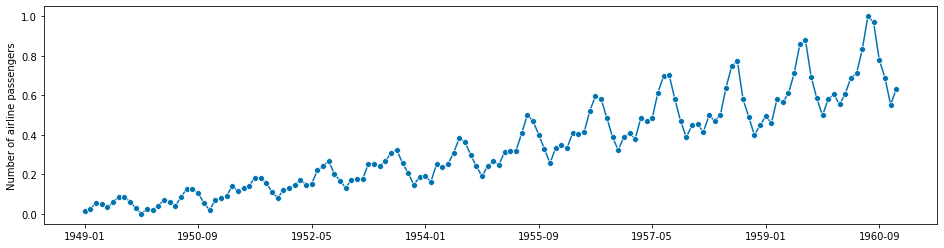

In [3]:
from pydata_sktime._2_1_1_simple_transformer_buggy import MinMaxScaler

transformer = MinMaxScaler()

y_transformed = transformer.fit_transform(y)

plot_series(y_transformed)
plt.show()

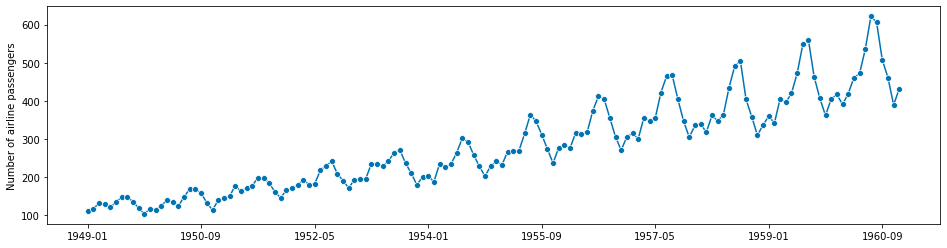

In [4]:
import numpy as np

y_inv_transformed = transformer.inverse_transform(y_transformed)

plot_series(y_inv_transformed)
plt.show()

# Check that the inverse is equal to the original
assert np.allclose(y_inv_transformed, y, atol=10**-6)

*Presentation note: move to the simple transformer section pydata_sktime/\_2_1_1_simple_transformer_buggy.py*

## What happens when we call fit?
Note: [make_mock_estimator]() is a testing/debugging utility function that returns an identical estimator as the one given in the inputs that logs all the methods that are called as well as their inputs

In [19]:
from pprint import pprint
from sktime.utils.estimators import make_mock_estimator

transformer_class = make_mock_estimator(MinMaxScaler)
transformer_instance = transformer_class()
transformer_instance.fit(y)

fit_log = transformer_instance.log
unique_methods = list(dict.fromkeys([entry[0] for entry in fit_log]))
pprint([entry[0] for entry in fit_log])
print("")

['fit',
 'reset',
 'get_params',
 'get_tag',
 'get_tags',
 'get_tag',
 'get_tags',
 '_check_X_y',
 'get_tag',
 'get_tags',
 'get_tag',
 'get_tags',
 'get_tag',
 'get_tags',
 '_fit']



**What are all these methods?**
1. `fit`: Fit transformer to X, optionally to y.
2. `reset`: Reset the object to a clean post-init state.
3. `get_params`: Get parameters for this estimator.
4. `get_tag`: Get tag value from estimator class and dynamic tag overrides.
5. `get_tags`: Get tags from estimator class and dynamic tag overrides.
6. `_check_X_y`: Check and coerce X/y for fit/transform functions.
7. `_fit`: Fit transformer to X and y.

## What happens when we call transform?

In [18]:
from pprint import pprint
from sktime.utils.estimators import make_mock_estimator

transformer_class = make_mock_estimator(MinMaxScaler)
transformer_instance = transformer_class()
transformer_instance.fit(y)
transformer_instance.transform(y)

transform_log = transformer_instance.log[len(fit_log):]
unique_methods = list(dict.fromkeys([entry[0] for entry in transform_log]))
pprint([entry[0] for entry in transform_log])
print("")

['transform',
 'check_is_fitted',
 '_check_X_y',
 'get_tag',
 'get_tags',
 'get_tag',
 'get_tags',
 'get_tag',
 'get_tags',
 '_transform',
 '_convert_output',
 'get_tag',
 'get_tags']



**What are all these methods?**
1. `transform`: Transform X and return a transformed version.
2. `check_is_fitted`: Check if the estimator has been fitted.
3. `_check_X_y`: Check and coerce X/y for fit/transform functions.
4. `get_tag`: Get tag value from estimator class and dynamic tag overrides.
5. `get_tags`: Get tags from estimator class and dynamic tag overrides.
6. `_transform`: Transform X and return a transformed version.
7. `_convert_output`: Convert transform or inverse_transform output to expected format.

# Testing Framework
*How do I ensure that my new estimator is good and compatible with the sktime API?*

sktime has a [check_estimator](https://www.sktime.org/en/latest/api_reference/auto_generated/sktime.utils.estimator_checks.check_estimator.html?highlight=make_mock_estimator#sktime.utils.estimator_checks.check_estimator) utility function that runs all the automated tests based on the type and tags of the estimator. You can use this in a notebook like below or as part of your own project's unit tests.

In [21]:
from sktime.utils.estimator_checks import check_estimator

results = check_estimator(MinMaxScaler, return_exceptions=True)

All tests PASSED!


**OH NO! A bug!** 

In [23]:
for key, val in results.items():
    if val != 'PASSED':
        print(f"Test: {key}")
        print(f"Error message: {val}")
        print("")

*Presentation note: move to the simple transformer section pydata_sktime/pydata_sktime.\_2_1_2_simple_transformer_complete.py*

**Lets see if we fixed it**

In [9]:
from pydata_sktime._2_1_2_simple_transformer_complete import MinMaxScaler

results = check_estimator(MinMaxScaler, return_exceptions=True)

All tests PASSED!


## :-)

# Implementing a simple moving average forecasting algorithm

We will use the extention templates to implement a simple moving average forecasting algorithm (not to be 
confused with a moving average which is not that simple).


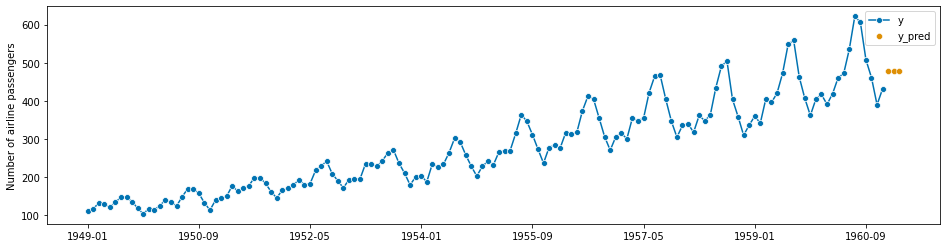

In [10]:
from pydata_sktime._2_2_1_simple_forecaster_complete import SimpleMovingAverage

forecaster = SimpleMovingAverage(window_length=5)
forecaster.fit(y)
y_pred = forecaster.predict(fh=[1, 2, 3])
plot_series(y, y_pred, labels=["y", "y_pred"])
plt.show()

*Presentation note: move to the simple forecaster sections in the codebase pydata_sktime.\_2_2_1_simple_forecaster_complete.py*

## What happens when we call fit?

In [12]:
from pprint import pprint
from sktime.utils.estimators import make_mock_estimator

forecaster_class = make_mock_estimator(SimpleMovingAverage)
forecaster_instance = forecaster_class()
forecaster_instance.fit(y)

fit_log = forecaster_instance.log
pprint([entry[0] for entry in fit_log])

['fit',
 'reset',
 'get_params',
 '_check_fh',
 'get_tag',
 'get_tags',
 '_check_X_y',
 'get_tag',
 'get_tags',
 'get_tag',
 'get_tags',
 'get_tag',
 'get_tags',
 'get_tag',
 'get_tags',
 '_update_y_X',
 '_set_cutoff_from_y',
 '_fit']


## What happens when we call predict?

In [13]:
from pprint import pprint
from sktime.utils.estimators import make_mock_estimator

forecaster_class = make_mock_estimator(SimpleMovingAverage)
forecaster_instance = forecaster_class()
forecaster_instance.fit(y)
forecaster_instance.predict(fh=[1, 2, 3])

predict_log = forecaster_instance.log[len(fit_log):]
pprint([entry[0] for entry in predict_log])

['predict',
 'check_is_fitted',
 '_check_fh',
 'get_tag',
 'get_tags',
 '_check_X',
 '_check_X_y',
 '_predict']


# Testing!

In [15]:
results = check_estimator(SimpleMovingAverage, return_exceptions=False)

All tests PASSED!
